In [1]:
#KNN project to predict the quality of red wine
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [2]:
path = 'winequality-red.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#all rows and columns are full, no Na data

In [6]:
#data.unique()

In [7]:
df = pd.DataFrame(data)

In [8]:
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [9]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [10]:
#the quality ratings are ranging between 3 and 8, for the red wine

In [11]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [12]:
print(data.shape)
print(data.columns.tolist())
print(data.dtypes)

(1599, 12)
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [13]:
#we see no object type data

In [14]:
from sklearn.preprocessing import StandardScaler

(array([[1.592e+03, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00],
        [1.599e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00],
        [1.599e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00],
        [1.596e+03, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
    

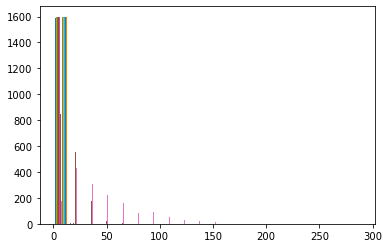

In [15]:
plt.hist(data,bins=20)

(array([ 10.,   0.,   0.,   0.,  53.,   0.,   0.,   0., 681.,   0.,   0.,
          0., 638.,   0.,   0.,   0., 199.,   0.,   0.,  18.]),
 array([3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 ,
        5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ]),
 <BarContainer object of 20 artists>)

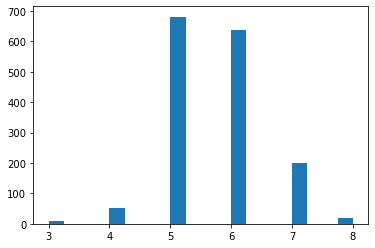

In [16]:
plt.hist(data['quality'],bins=20)

In [17]:
#majority is rated an average 6,5

In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
import os
#import seaborn as sns

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [21]:
#print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

In [22]:
print(df['quality'].skew())
df['quality'].describe()

0.21780157547366327


count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

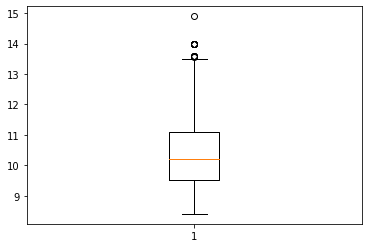

In [23]:
plt.boxplot(df["alcohol"])
plt.show()

<AxesSubplot:>

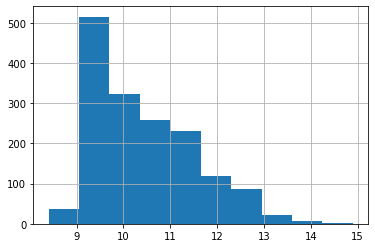

In [24]:
df.alcohol.hist()

<AxesSubplot:>

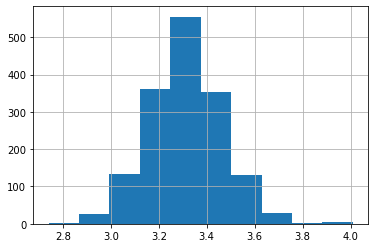

In [25]:
df.pH.hist()

<AxesSubplot:>

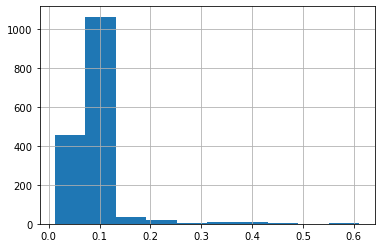

In [26]:
df.chlorides.hist()

<AxesSubplot:>

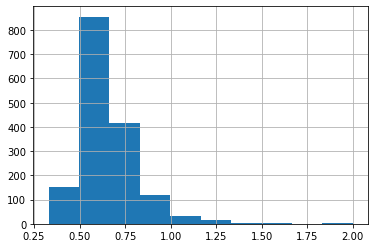

In [27]:
df.sulphates.hist()

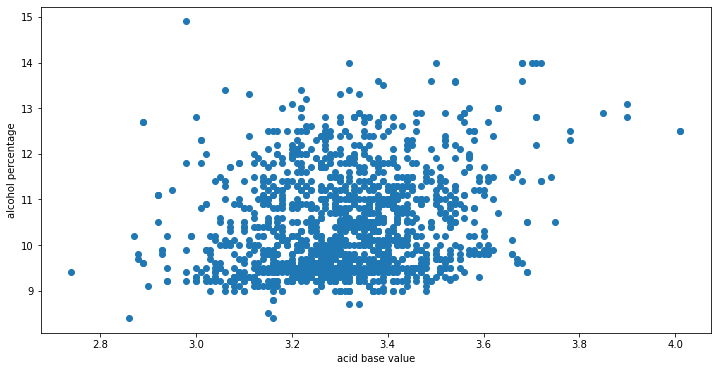

In [28]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['pH'], df['alcohol'])
ax.set_xlabel('acid base value')
ax.set_ylabel('alcohol percentage')
plt.show()

In [29]:
#some outliers identified

In [30]:
print(df['pH'].quantile(0.10))
print(df['pH'].quantile(0.90))

print(df['alcohol'].quantile(0.10))
print(df['alcohol'].quantile(0.90))

print(df['chlorides'].quantile(0.10))
print(df['chlorides'].quantile(0.90))

print(df['fixed acidity'].quantile(0.10))
print(df['fixed acidity'].quantile(0.90))

print(df['volatile acidity'].quantile(0.10))
print(df['volatile acidity'].quantile(0.90))

print(df['citric acid'].quantile(0.10))
print(df['citric acid'].quantile(0.90))

print(df['residual sugar'].quantile(0.10))
print(df['residual sugar'].quantile(0.90))

print(df['free sulfur dioxide'].quantile(0.10))
print(df['free sulfur dioxide'].quantile(0.90))

print(df['total sulfur dioxide'].quantile(0.10))
print(df['total sulfur dioxide'].quantile(0.90))

print(df['density'].quantile(0.10))
print(df['density'].quantile(0.90))

print(df['sulphates'].quantile(0.10))
print(df['sulphates'].quantile(0.90))

3.12
3.51
9.3
12.0
0.06
0.109
6.5
10.7
0.31
0.745
0.010000000000000002
0.5220000000000005
1.6999999999999997
3.6
5.0
31.0
14.0
93.20000000000005
0.994556
0.99914
0.5
0.85


In [31]:
#index = df[(df['density'] >= 0.99914)|(df['density'] <= 0.994556)].index
#df.drop(index, inplace=True)
#df['density'].describe()

In [32]:
#index = df[(df['sulphates'] >= 0.85)|(df['sulphates'] <= 0.5)].index
#df.drop(index, inplace=True)
#df['sulphates'].describe()

In [33]:
#index = df[(df['total sulfur dioxide'] >= 93.20)|(df['total sulfur dioxide'] <= 14.0)].index
#df.drop(index, inplace=True)
#df['total sulfur dioxide'].describe()

In [34]:
#index = df[(df['free sulfur dioxide'] >= 31.0)|(df['free sulfur dioxide'] <= 5.0)].index
#df.drop(index, inplace=True)
#df['free sulfur dioxide'].describe()

In [35]:
#index = df[(df['residual sugar'] >= 3.6)|(df['residual sugar'] <= 1.6999)].index
#df.drop(index, inplace=True)
#df['residual sugar'].describe()

In [36]:
#index = df[(df['citric acid'] >= 0.522)|(df['citric acid'] <= 0.0100)].index
##df.drop(index, inplace=True)
#df['citric acid'].describe()

In [37]:
#index = df[(df['volatile acidity'] >= 0.745)|(df['volatile acidity'] <= 0.31)].index
#df.drop(index, inplace=True)
#df['volatile acidity'].describe()

In [38]:
#index = df[(df['pH'] >= 3.55)|(df['pH'] <= 3.10)].index
#df.drop(index, inplace=True)
#df['pH'].describe()

In [39]:
#index = df[(df['fixed acidity'] >= 10.7)|(df['fixed acidity'] <= 6.5)].index
#df.drop(index, inplace=True)
#df['fixed acidity'].describe()

In [40]:
#index = df[(df['alcohol'] >= 12.0)|(df['alcohol'] <= 9.2)].index
#df.drop(index, inplace=True)
#df['alcohol'].describe()

In [41]:
#index = df[(df['chlorides'] >= 0.109)|(df['chlorides'] <= 0.06)].index
#df.drop(index, inplace=True)
#df['chlorides'].describe()

In [42]:
df.shape

(1599, 12)

In [43]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
#df.shape
from sklearn.model_selection import train_test_split

In [46]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [47]:
#x.shape

In [48]:
#y.shape

In [49]:
scaler = RobustScaler()
scaler.fit(df.drop('quality',axis=1))
scaled_features = scaler.transform(df.drop('quality',axis=1))



In [50]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50
1,-0.047619,1.44,-0.787879,0.571429,0.95,0.785714,0.725,0.022371,-0.578947,0.333333,-0.25
2,-0.047619,0.96,-0.666667,0.142857,0.65,0.071429,0.400,0.111857,-0.263158,0.166667,-0.25
3,1.571429,-0.96,0.909091,-0.428571,-0.20,0.214286,0.550,0.559284,-0.789474,-0.222222,-0.25
4,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50


In [51]:
x = df.drop('quality', axis=1)
y = df.quality
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

(array([[1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1397.,  198.,    4.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 607.,  535.,  246.,  139.,   54.,   16.,    0.,    0.,    0.,
            2.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.

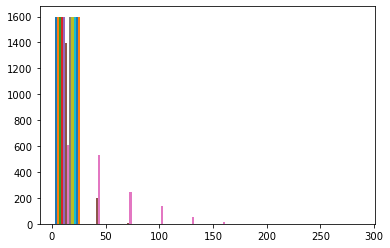

In [52]:
plt.hist(df)

In [53]:
cor = x_train.corr()

In [54]:
print(cor)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.259657     0.682969   
volatile acidity          -0.259657          1.000000    -0.562878   
citric acid                0.682969         -0.562878     1.000000   
residual sugar             0.106861          0.029184     0.099913   
chlorides                  0.104404          0.065459     0.205196   
free sulfur dioxide       -0.147761         -0.005162    -0.071561   
total sulfur dioxide      -0.110484          0.089929     0.012473   
density                    0.668798          0.031389     0.373078   
pH                        -0.683982          0.215800    -0.533946   
sulphates                  0.177084         -0.245630     0.305085   
alcohol                   -0.084034         -0.195943     0.080294   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.106861   0.104404            -0.147761   
volatile acidit

In [55]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [56]:
corr_features = correlation(x_train, 0.9)
len(set(corr_features))

0

In [57]:
#no corelated features above 90 percent

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors=20)
#we will derive k value in further splits, 20 just for example

In [60]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [61]:
pred = knn.predict(x_test)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [63]:
print(confusion_matrix(y_test,pred))

[[  0   0   2   1   0   0]
 [  0   0   9   3   0   0]
 [  0   0 167  67   1   0]
 [  0   0  68 102   3   0]
 [  0   0   9  37   6   0]
 [  0   0   0   4   1   0]]


In [64]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        12
           5       0.65      0.71      0.68       235
           6       0.48      0.59      0.53       173
           7       0.55      0.12      0.19        52
           8       0.00      0.00      0.00         5

    accuracy                           0.57       480
   macro avg       0.28      0.24      0.23       480
weighted avg       0.55      0.57      0.54       480



/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
#choosing k value

In [66]:
accuracy_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['quality'],cv=15)
    accuracy_rate.append(score.mean())

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/skl

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/skl

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/skl

In [67]:
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['quality'],cv=15)
    error_rate.append(1-score.mean())

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/skl

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/skl

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/skl

In [68]:

error_rate = []

# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

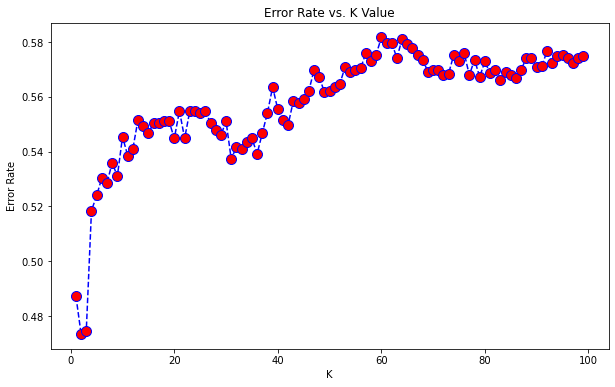

In [69]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,100),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [70]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[  1   0   1   0   1   0]
 [  1   0   5   5   0   1]
 [  0   9 150  64  11   1]
 [  0   3  46 108  13   3]
 [  0   0   5  17  29   1]
 [  0   0   0   1   3   1]]


              precision    recall  f1-score   support

           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00        12
           5       0.72      0.64      0.68       235
           6       0.55      0.62      0.59       173
           7       0.51      0.56      0.53        52
           8       0.14      0.20      0.17         5

    accuracy                           0.60       480
   macro avg       0.41      0.39      0.39       480
weighted avg       0.61      0.60      0.61       480



In [71]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=24)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=24')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=24


[[  0   0   1   2   0   0]
 [  0   0   8   4   0   0]
 [  0   0 157  76   2   0]
 [  0   0  70  98   5   0]
 [  0   0  12  35   5   0]
 [  0   0   0   5   0   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        12
           5       0.63      0.67      0.65       235
           6       0.45      0.57      0.50       173
           7       0.42      0.10      0.16        52
           8       0.00      0.00      0.00         5

    accuracy                           0.54       480
   macro avg       0.25      0.22      0.22       480
weighted avg       0.52      0.54      0.51       480



/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# NOW WITH K=60
knn = KNeighborsClassifier(n_neighbors=60)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=60')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=60


[[  0   0   1   2   0   0]
 [  0   0   8   4   0   0]
 [  0   0 149  86   0   0]
 [  0   0  61 112   0   0]
 [  0   0  10  42   0   0]
 [  0   0   0   5   0   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        12
           5       0.65      0.63      0.64       235
           6       0.45      0.65      0.53       173
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00         5

    accuracy                           0.54       480
   macro avg       0.18      0.21      0.20       480
weighted avg       0.48      0.54      0.50       480



/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[  0   1   1   0   1   0]
 [  1   0   7   4   0   0]
 [  2  10 146  71   6   0]
 [  1  11  69  79  13   0]
 [  0   3  10  29  10   0]
 [  0   0   1   1   3   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        12
           5       0.62      0.62      0.62       235
           6       0.43      0.46      0.44       173
           7       0.30      0.19      0.24        52
           8       0.00      0.00      0.00         5

    accuracy                           0.49       480
   macro avg       0.23      0.21      0.22       480
weighted avg       0.49      0.49      0.49       480



/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
